<a href="https://colab.research.google.com/github/KargavkarKaran/SCT_DS_4/blob/main/Road_Accidents_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ID           State        Date      Time              Reason  \
0  1001  Andhra Pradesh  01-05-2021  15:30:00            Speeding   
1  1002       Telangana  02-05-2021  09:45:00       Drunk driving   
2  1003          Kerala  03-05-2021  18:15:00  Weather conditions   
3  1004      Tamil Nadu  04-05-2021  12:00:00      Lane violation   
4  1005       Karnataka  05-05-2021  20:30:00            Speeding   

   Number_of_Deaths  Number_of_Injuries Road_Type Weather_Conditions High_Way  \
0                 2                   3     Rural              Sunny       No   
1                 1                   2     Urban              Clear       No   
2                 3                   5     Rural              Rainy      Yes   
3                 1                   0     Urban             Cloudy       No   
4                 2                   4     Rural              Foggy      Yes   

  Lane_or_Road_conditions  Speed_Limit  
0                    Poor           60  
1               

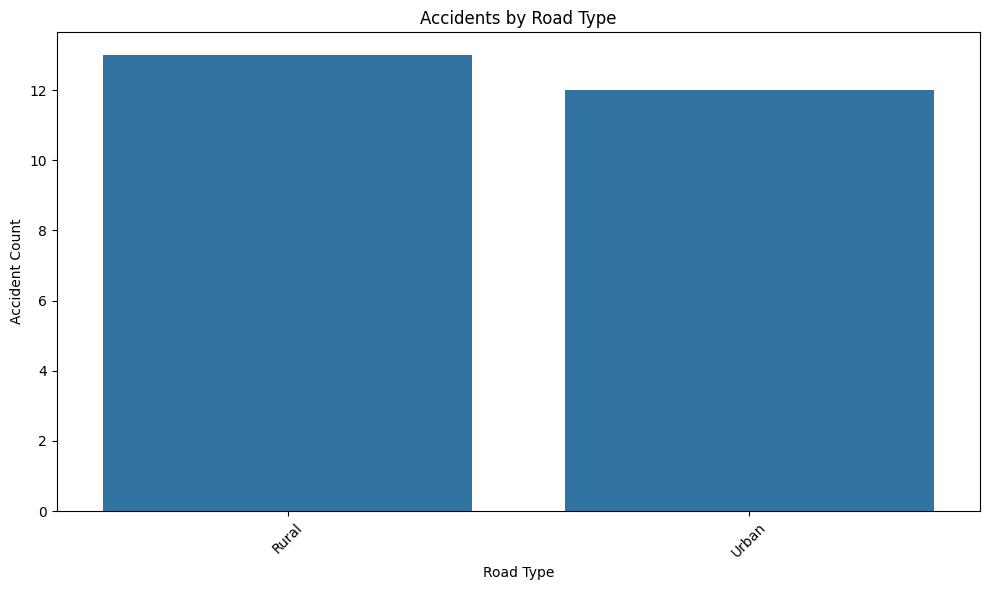

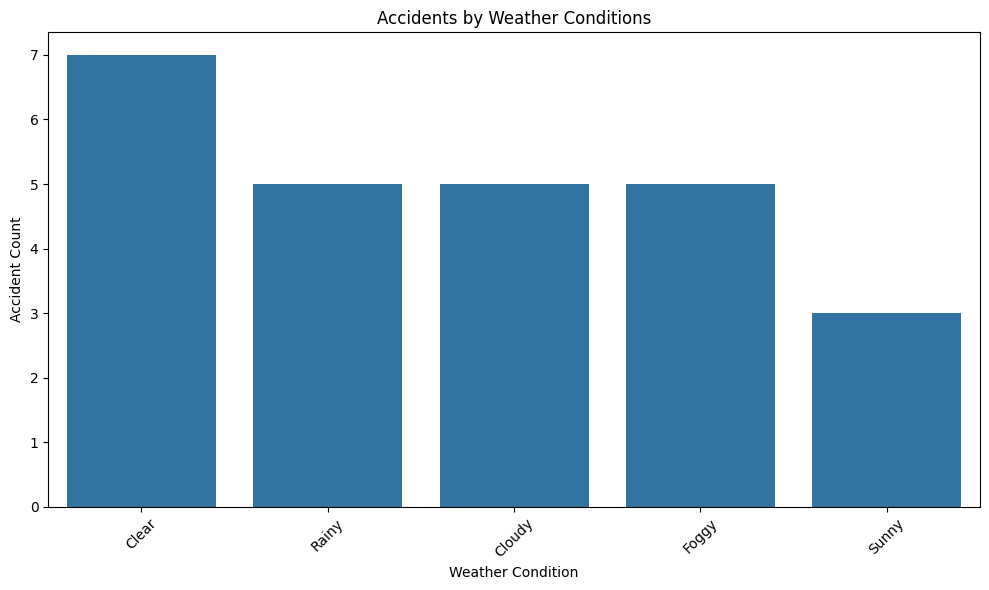

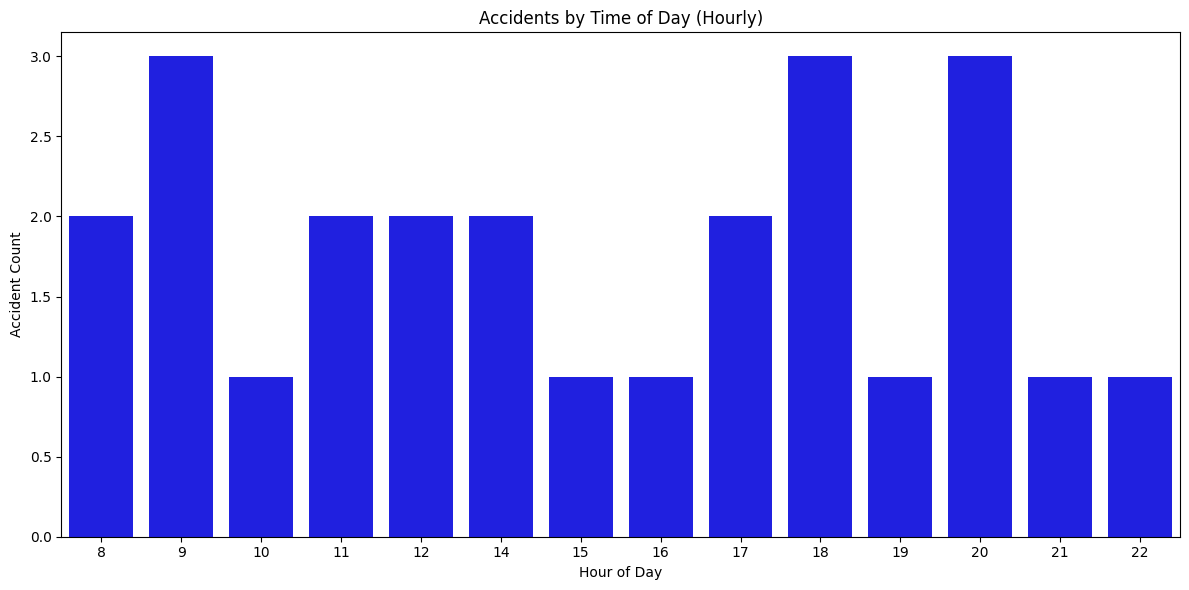

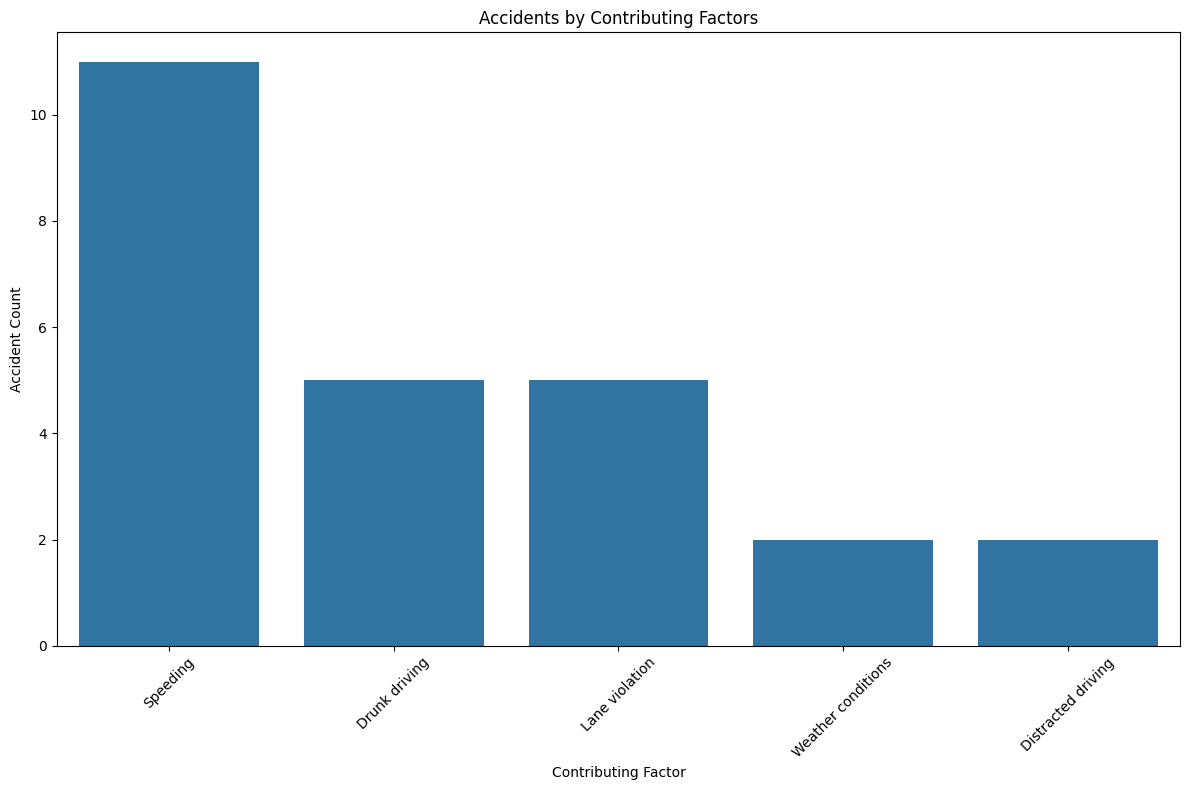

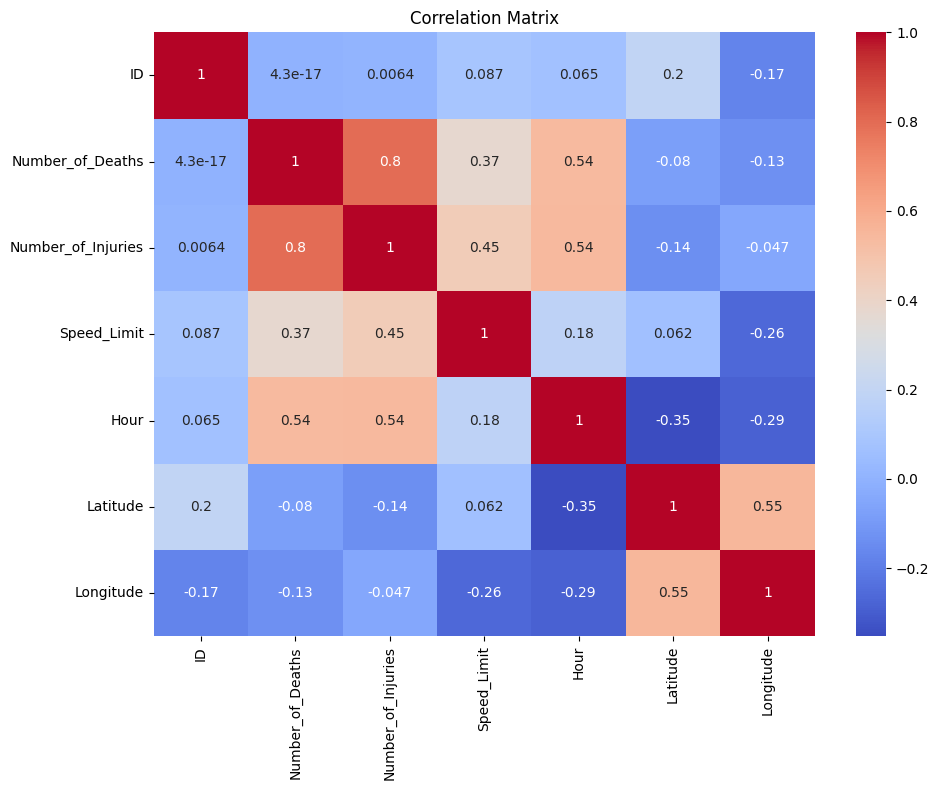

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # Import folium library
from folium.plugins import HeatMap
import random

# Define the data directly in a list of dictionaries
data = [
     {"ID": 1001, "State": "Andhra Pradesh", "Date": "01-05-2021", "Time": "15:30:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 3, "Road_Type": "Rural", "Weather_Conditions": "Sunny", "High_Way": "No", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 60},
    {"ID": 1002, "State": "Telangana", "Date": "02-05-2021", "Time": "09:45:00", "Reason": "Drunk driving", "Number_of_Deaths": 1, "Number_of_Injuries": 2, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "No", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1003, "State": "Kerala", "Date": "03-05-2021", "Time": "18:15:00", "Reason": "Weather conditions", "Number_of_Deaths": 3, "Number_of_Injuries": 5, "Road_Type": "Rural", "Weather_Conditions": "Rainy", "High_Way": "Yes", "Lane_or_Road_conditions": "Wet", "Speed_Limit": 70},
    {"ID": 1004, "State": "Tamil Nadu", "Date": "04-05-2021", "Time": "12:00:00", "Reason": "Lane violation", "Number_of_Deaths": 1, "Number_of_Injuries": 0, "Road_Type": "Urban", "Weather_Conditions": "Cloudy", "High_Way": "No", "Lane_or_Road_conditions": "Fair", "Speed_Limit": 60},
    {"ID": 1005, "State": "Karnataka", "Date": "05-05-2021", "Time": "20:30:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 4, "Road_Type": "Rural", "Weather_Conditions": "Foggy", "High_Way": "Yes", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 80},
    {"ID": 1006, "State": "Maharashtra", "Date": "06-05-2021", "Time": "17:00:00", "Reason": "Distracted driving", "Number_of_Deaths": 1, "Number_of_Injuries": 2, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "No", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1007, "State": "Gujarat", "Date": "07-05-2021", "Time": "14:45:00", "Reason": "Speeding", "Number_of_Deaths": 3, "Number_of_Injuries": 6, "Road_Type": "Rural", "Weather_Conditions": "Rainy", "High_Way": "Yes", "Lane_or_Road_conditions": "Wet", "Speed_Limit": 70},
    {"ID": 1008, "State": "Uttar Pradesh", "Date": "08-05-2021", "Time": "11:30:00", "Reason": "Lane violation", "Number_of_Deaths": 2, "Number_of_Injuries": 1, "Road_Type": "Urban", "Weather_Conditions": "Cloudy", "High_Way": "No", "Lane_or_Road_conditions": "Fair", "Speed_Limit": 60},
    {"ID": 1009, "State": "Rajasthan", "Date": "09-05-2021", "Time": "09:00:00", "Reason": "Speeding", "Number_of_Deaths": 1, "Number_of_Injuries": 3, "Road_Type": "Rural", "Weather_Conditions": "Foggy", "High_Way": "No", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 80},
    {"ID": 1010, "State": "Madhya Pradesh", "Date": "10-05-2021", "Time": "21:00:00", "Reason": "Drunk driving", "Number_of_Deaths": 2, "Number_of_Injuries": 4, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "Yes", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1011, "State": "Bihar", "Date": "11-05-2021", "Time": "16:20:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 3, "Road_Type": "Rural", "Weather_Conditions": "Sunny", "High_Way": "No", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 60},
    {"ID": 1012, "State": "West Bengal", "Date": "12-05-2021", "Time": "08:10:00", "Reason": "Drunk driving", "Number_of_Deaths": 1, "Number_of_Injuries": 2, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "No", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1013, "State": "Odisha", "Date": "13-05-2021", "Time": "19:00:00", "Reason": "Lane violation", "Number_of_Deaths": 3, "Number_of_Injuries": 5, "Road_Type": "Rural", "Weather_Conditions": "Rainy", "High_Way": "Yes", "Lane_or_Road_conditions": "Wet", "Speed_Limit": 70},
    {"ID": 1014, "State": "Punjab", "Date": "14-05-2021", "Time": "10:30:00", "Reason": "Speeding", "Number_of_Deaths": 1, "Number_of_Injuries": 0, "Road_Type": "Urban", "Weather_Conditions": "Cloudy", "High_Way": "No", "Lane_or_Road_conditions": "Fair", "Speed_Limit": 60},
    {"ID": 1015, "State": "Haryana", "Date": "15-05-2021", "Time": "22:45:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 4, "Road_Type": "Rural", "Weather_Conditions": "Foggy", "High_Way": "Yes", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 80},
    {"ID": 1016, "State": "Assam", "Date": "16-05-2021", "Time": "18:30:00", "Reason": "Distracted driving", "Number_of_Deaths": 1, "Number_of_Injuries": 2, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "No", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1017, "State": "Chhattisgarh", "Date": "17-05-2021", "Time": "14:15:00", "Reason": "Speeding", "Number_of_Deaths": 3, "Number_of_Injuries": 6, "Road_Type": "Rural", "Weather_Conditions": "Rainy", "High_Way": "Yes", "Lane_or_Road_conditions": "Wet", "Speed_Limit": 70},
    {"ID": 1018, "State": "Jharkhand", "Date": "18-05-2021", "Time": "11:00:00", "Reason": "Lane violation", "Number_of_Deaths": 2, "Number_of_Injuries": 1, "Road_Type": "Urban", "Weather_Conditions": "Cloudy", "High_Way": "No", "Lane_or_Road_conditions": "Fair", "Speed_Limit": 60},
    {"ID": 1019, "State": "Uttarakhand", "Date": "19-05-2021", "Time": "08:30:00", "Reason": "Speeding", "Number_of_Deaths": 1, "Number_of_Injuries": 3, "Road_Type": "Rural", "Weather_Conditions": "Foggy", "High_Way": "No", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 80},
    {"ID": 1020, "State": "Goa", "Date": "20-05-2021", "Time": "20:00:00", "Reason": "Drunk driving", "Number_of_Deaths": 2, "Number_of_Injuries": 4, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "Yes", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1021, "State": "Himachal Pradesh", "Date": "21-05-2021", "Time": "17:30:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 3, "Road_Type": "Rural", "Weather_Conditions": "Sunny", "High_Way": "No", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 60},
    {"ID": 1022, "State": "Manipur", "Date": "22-05-2021", "Time": "09:45:00", "Reason": "Drunk driving", "Number_of_Deaths": 1, "Number_of_Injuries": 2, "Road_Type": "Urban", "Weather_Conditions": "Clear", "High_Way": "No", "Lane_or_Road_conditions": "Good", "Speed_Limit": 50},
    {"ID": 1023, "State": "Meghalaya", "Date": "23-05-2021", "Time": "18:15:00", "Reason": "Weather conditions", "Number_of_Deaths": 3, "Number_of_Injuries": 5, "Road_Type": "Rural", "Weather_Conditions": "Rainy", "High_Way": "Yes", "Lane_or_Road_conditions": "Wet", "Speed_Limit": 70},
    {"ID": 1024, "State": "Mizoram", "Date": "24-05-2021", "Time": "12:00:00", "Reason": "Lane violation", "Number_of_Deaths": 1, "Number_of_Injuries": 0, "Road_Type": "Urban", "Weather_Conditions": "Cloudy", "High_Way": "No", "Lane_or_Road_conditions": "Fair", "Speed_Limit": 60},
    {"ID": 1025, "State": "Nagaland", "Date": "25-05-2021", "Time": "20:30:00", "Reason": "Speeding", "Number_of_Deaths": 2, "Number_of_Injuries": 4, "Road_Type": "Rural", "Weather_Conditions": "Foggy", "High_Way": "Yes", "Lane_or_Road_conditions": "Poor", "Speed_Limit": 80}
    # Continue with the rest of your data here
]

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset to ensure it's loaded correctly
print(df.head())

# Check for non-time values in the 'Time' column and handle them
# Replace non-time values with NaT (Not a Time)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Plot accidents by road conditions (assuming 'Road_Type' is the column name)
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Type', data=df, order=df['Road_Type'].value_counts().index)
plt.title('Accidents by Road Type')
plt.xticks(rotation=45)
plt.xlabel('Road Type')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by time of day (hourly)
plt.figure(figsize=(12, 6))
df['Hour'] = df['Time'].dt.hour
sns.countplot(x='Hour', data=df, color='blue')
plt.title('Accidents by Time of Day (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

# Plot accidents by contributing factors (Reason column)
plt.figure(figsize=(12, 8))
sns.countplot(x='Reason', data=df, order=df['Reason'].value_counts().index)
plt.title('Accidents by Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming latitude_center and longitude_center are defined for your area of interest
# Create a base map
latitude_center = 37.7749  # Replace with actual latitude center
longitude_center = -122.4194  # Replace with actual longitude center
accident_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=5)

# Add heatmap for accident hotspots (assuming latitude and longitude columns are available)
# For simplicity, generating mock latitude and longitude data
df['Latitude'] = [random.uniform(37.6, 37.9) for _ in range(len(df))]
df['Longitude'] = [random.uniform(-122.6, -122.3) for _ in range(len(df))]

# Create a list of lists containing latitude, longitude, and intensity (which is just 1 for each record)
heat_data = [[row['Latitude'], row['Longitude'], 1] for index, row in df.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(accident_map)

# Display the map
accident_map.save('accident_hotspots.html')

# Select numeric columns for correlation analysis
# Exclude 'Road_Type', 'Latitude', and 'Longitude' as they are non-numeric for correlation
numeric_columns = ['Number_of_Deaths', 'Number_of_Injuries', 'Speed_Limit']

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Explore correlations between numerical variables
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
